In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install category_encoders==2.*
  !pip install pandas-profiling==2.*
  !pip install plotly==4.*

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline

plt.style.use('fivethirtyeight')


import nltk
from nltk.corpus import wordnet as wn

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
from google.colab import files
myfiles = files.upload()

Saving preprocessed_meta_data_last.csv to preprocessed_meta_data_last.csv


In [7]:
df_r = pd.read_csv('preprocessed_meta_data_last.csv', index_col=0, 
            dtype={'imdbId':'str','tmdbId':'str'})

In [ ]:
p = Path('.')
df_r = pd.read_csv(p / 'preprocessed_meta_data_last.csv', index_col=0, 
            dtype={'imdbId':'str','tmdbId':'str'})

In [ ]:
df_r.head(2).T

,0,1
tmdbID,862,8844
original_language,en,en
original_title,Toy Story,Jumanji
popularity,21.946943,17.015539
runtime,81.0,104.0
spoken_languages,1,2
status,Released,Released
vote_average,7.7,6.9
vote_count,5415.0,2413.0
imdbId,0114709,0113497


In [ ]:
df_r.nunique()

tmdbID                       45413
original_language               46
original_title               43354
popularity                   43745
runtime                        353
spoken_languages                14
status                           6
vote_average                    92
vote_count                    1820
imdbId                       45413
genres_tmdb                   4063
genres_tmdb_complexity           9
collection                    1694
n_production_companies          26
main_production_companies      373
n_production_countries          15
main_production_countries       73
year                           135
month                           12
budget                        2625
gross_world                  19424
incomes                       9879
movieId                      45337
tmdbId                       45337
rating                       12969
actor_1_name                 18368
actor_2_name                 22377
actor_3_name                 24493
actor_1_gender      

In [ ]:
df_r.isnull().sum()

tmdbID                           0
original_language                0
original_title                   0
popularity                       0
runtime                        255
spoken_languages                 0
status                          81
vote_average                     0
vote_count                       0
imdbId                           0
genres_tmdb                   2438
genres_tmdb_complexity           0
collection                       0
n_production_companies           0
main_production_companies    11887
n_production_countries           0
main_production_countries     6283
year                            11
month                           11
budget                       29849
gross_world                  25774
incomes                      35594
movieId                         76
tmdbId                          76
rating                         615
actor_1_name                  2416
actor_2_name                  3745
actor_3_name                  4657
actor_1_gender      

In [8]:
df = df_r.copy()

/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='actor_3_nominat', ylabel='Density'>

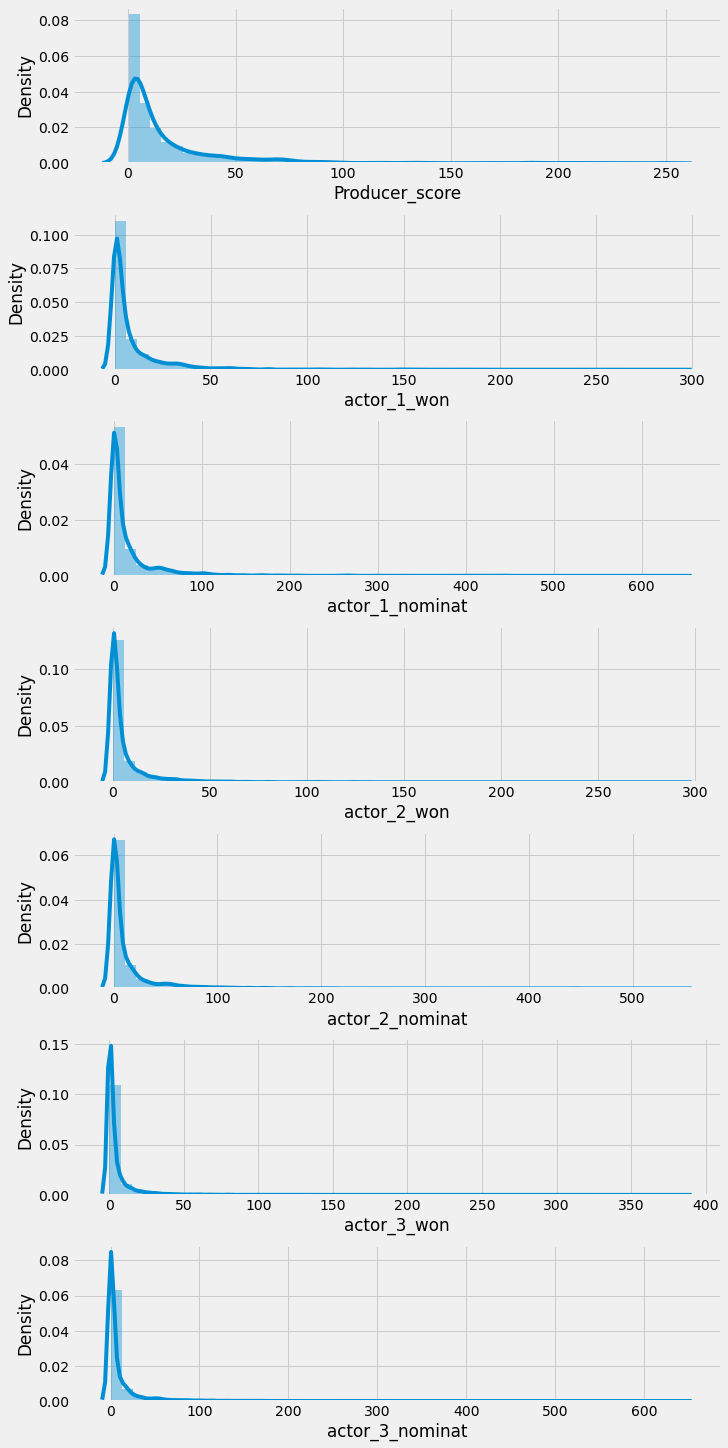

In [ ]:
fig, ax = plt.subplots(7, figsize=(10,20), constrained_layout=True, clear=True)
sns.distplot(df['Producer_score'], ax=ax[0])
sns.distplot(df['actor_1_won'], ax=ax[1])
sns.distplot(df['actor_1_nominat'], ax=ax[2])
sns.distplot(df['actor_2_won'], ax=ax[3])
sns.distplot(df['actor_2_nominat'], ax=ax[4])
sns.distplot(df['actor_3_won'], ax=ax[5])
sns.distplot(df['actor_3_nominat'], ax=ax[6])


/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='incomes', ylabel='Density'>

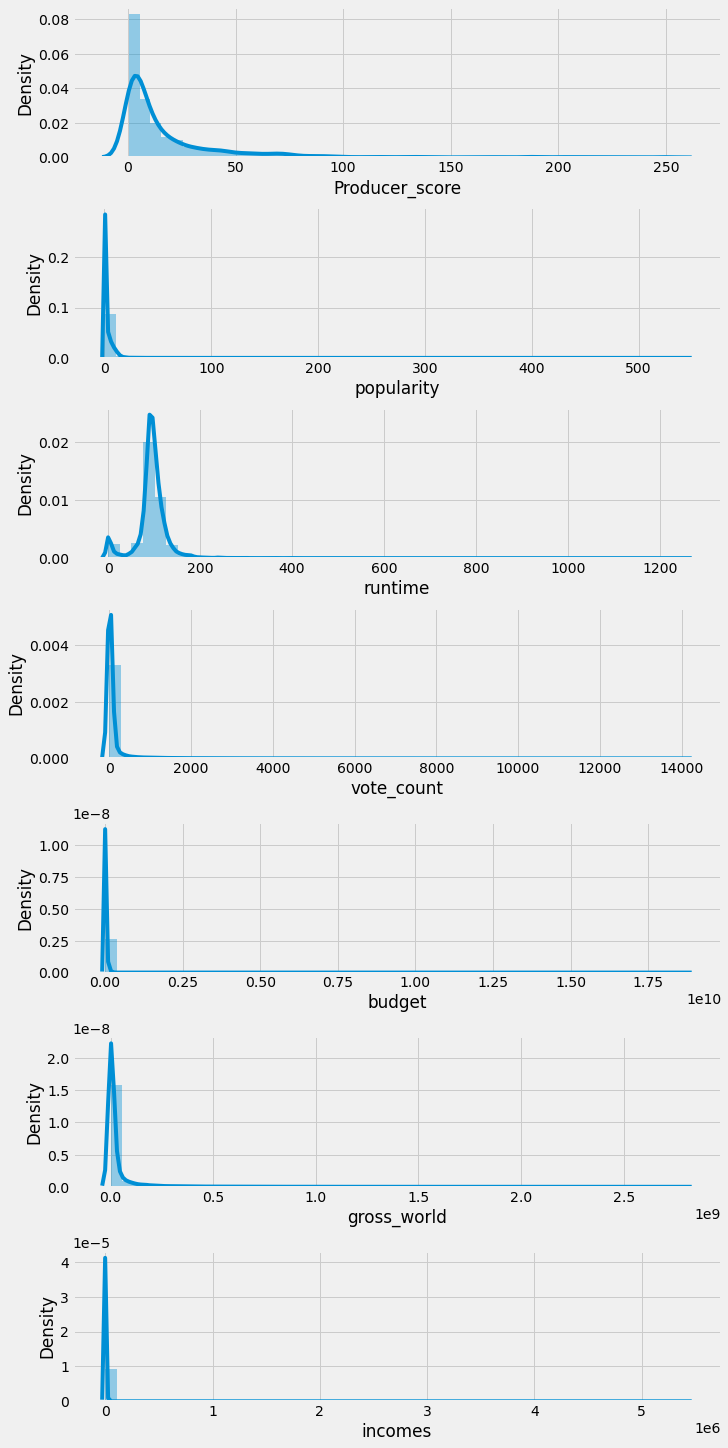

In [ ]:
fig, ax = plt.subplots(7, figsize=(10,20), constrained_layout=True, clear=True)
sns.distplot(df['Producer_score'], ax=ax[0])
sns.distplot(df['popularity'], ax=ax[1])
sns.distplot(df['runtime'], ax=ax[2])
sns.distplot(df['vote_count'], ax=ax[3])
sns.distplot(df['budget'], ax=ax[4])
sns.distplot(df['gross_world'], ax=ax[5])
sns.distplot(df['incomes'], ax=ax[6])


<AxesSubplot:xlabel='rating', ylabel='Producer_score'>

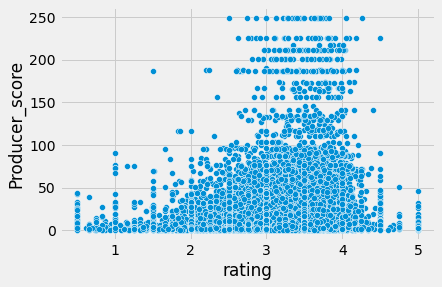

In [ ]:
sns.scatterplot(y=df['Producer_score'],x=df['rating'])

In [9]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tmdbID,45519.000,108308.211,112399.208,2.000,26395.000,60009.000,157157.000,469172.000
popularity,45519.000,2.923,6.003,0.000,0.386,1.129,3.683,547.488
runtime,45264.000,94.134,38.391,0.000,85.000,95.000,107.000,1256.000
spoken_languages,45519.000,1.172,0.753,0.000,1.000,1.000,1.000,19.000
vote_average,45519.000,5.619,1.923,0.000,5.000,6.000,6.800,10.000
vote_count,45519.000,109.827,491.003,0.000,3.000,10.000,34.000,14075.000
genres_tmdb_complexity,45519.000,2.005,1.131,0.000,1.000,2.000,3.000,8.000
n_production_companies,45519.000,1.553,1.745,0.000,0.000,1.000,2.000,26.000
n_production_countries,45519.000,1.088,0.768,0.000,1.000,1.000,1.000,25.000
year,45508.000,1991.899,24.053,1874.000,1978.000,2001.000,2010.000,2020.000


In [10]:
genres_sep = df['genres_tmdb'].apply(lambda x: x.split('|') if isinstance(x, str) else 0).apply(lambda x:pd.Series(x))

In [11]:
w_genres = genres_sep[1].sort_values().unique()

In [14]:
genre_tag = nltk.pos_tag(w_genres[:-1]) # nan 빼고
genre_tag

[('Action', 'NNP'),
 ('Adventure', 'NNP'),
 ('Animation', 'NNP'),
 ('Comedy', 'NNP'),
 ('Crime', 'NNP'),
 ('Documentary', 'NNP'),
 ('Drama', 'NNP'),
 ('Family', 'NNP'),
 ('Fantasy', 'NNP'),
 ('Foreign', 'NNP'),
 ('History', 'NNP'),
 ('Horror', 'NNP'),
 ('Music', 'NNP'),
 ('Mystery', 'NNP'),
 ('Romance', 'NNP'),
 ('Science Fiction', 'NNP'),
 ('TV Movie', 'NNP'),
 ('Thriller', 'NNP'),
 ('War', 'NNP'),
 ('Western', 'NNP')]

In [15]:
genre_mapping= {'Action': 'action.n.02'
                ,'Adventure': 'adventure.n.01'
                ,'Animation' : 'animation.n.05'
                ,'Comedy' : 'comedy.n.01'
                ,'Crime' : 'crime.n.01'
                , 'Documentary' : 'documentary.n.01'
                , 'Drama' : 'drama.n.02'
                , 'Family': 'family.n.01'
                , 'Fantasy': 'fantasy.n.01'
                , 'Foreign': 'foreign.a.02'
                , 'History': 'history.n.02'
                , 'Horror': 'horror.n.01'
                , 'Music': 'music.n.01'
                , 'Mystery': 'mystery.n.02'
                , 'Romance': 'romance.n.05'
                , 'Science Fiction': 'science.n.01' # 단어 목록에 없어서 임의로 science 할당, 어쨌든 뜻은 유사하니까?
                , 'TV Movie': 'movie.n.01' # 여기도 마찬가지
                , 'Thriller': 'thriller.n.01'
                , 'War': 'war.n.01'
                , 'Western': 'western.n.01'
               }

In [ ]:
# 단어 동의어 중 올바른것 선택해서 mapping 해주었음
for g in genre_tag:
    print(g)
    for i in wn.synsets(g[0]):
        print(i,i.definition())
    print('\n')

In [17]:
genrelist = df['genres_tmdb'][0].split('|')
[x for x in genrelist if genrelist[0]!= x]

['Comedy', 'Family']

In [19]:
def genre_similarity(x):
    
    try :
        genre_list = x.split('|')
    except : # 장르가 nan인 데이터
        return np.nan, np.nan
    
    if len(genre_list) < 2: # 장르가 1개면 유사도는 1, 기본 장르만 return
        return 1, str(genre_list[0])
    
    tmp_min = None
    cnt = 0

    for x in genre_list:

        for sub in [xx for xx in genre_list if xx!=x]:
            g_1 = wn.synset(genre_mapping[x])
            # 두 장르 간 유사도
            sim_value = g_1.path_similarity(wn.synset(genre_mapping[sub]))

            if cnt == 0: # 첫번째는 그냥 할당
                tmp_min = g_1.path_similarity(wn.synset(genre_mapping[sub]))
                val_1 = x
                val_2 = sub

            elif tmp_min > sim_value: # 다음 유사도가 더 작으면
                
                tmp_min = g_1.path_similarity(wn.synset(genre_mapping[sub]))
                # 현재 비교 중인 장르로 교환
                val_1 = x
                val_2 = sub
                
            else : # 유사도가 더 작지 않으면 첫 번째 유사도 유지
                tmp_min = tmp_min

    for n,i in enumerate(sorted([val_1, val_2])):
        if n < 1:
            ss = i
        else :
            ss = ss+'|'+i

    return tmp_min, ss

In [20]:
df['genres_tmdb']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
45514                Drama|Family
45515                       Drama
45516       Action|Drama|Thriller
45517                         NaN
45518                         NaN
Name: genres_tmdb, Length: 45519, dtype: object

#### 장르 2개 조합을 통해 카디널리티를 많이 줄임

In [ ]:
print(df['main_production_companies'].isnull().sum())
print(df['main_production_companies'].nunique())

11887
373


In [ ]:
pp = df['main_production_companies'].value_counts().reset_index()
pp[pp['main_production_companies']>10]

,index,main_production_companies
0,etc,17931
1,Paramount Pictures,1002
2,Metro-Goldwyn-Mayer (MGM),854
3,Twentieth Century Fox Film Corporation,780
4,Warner Bros.,757
...,...,...
368,Paramount Vantage,11
369,Irish Film Board,11
370,Woodfall Film Productions,11
371,"RKO Radio Pictures, Inc.",11


In [21]:
df = df_r.copy()

def engineer_fin(df):
    
    # target rating 결측 제거
    df = df[~df['rating'].isnull()]
    
    # runtime mean imputation
    df.loc[df['runtime']==0,'runtime'] = df.runtime.mean()
    df.loc[df['runtime'].isnull(),'runtime'] = df.runtime.mean()
    
    # 감독 스코어 결측은 mean으로 채우지 않고 0으로 채움
    df.loc[df['Producer_score'].isnull(),'Producer_score'] = 0

    # 지나치게 긴 runtime은 outlier 로 제거
    df = df[~(df['runtime'] > np.nanpercentile(df['runtime'], 99.9))]
    
    # popularity & vote count 의 극단치는 의미가 있음 로그 변환만해줌
    df['popularity'] = np.log1p(df['popularity'].astype(float))
    # vote count 0는 말 그대로 0
    df['vote_count'] = np.log1p(df['vote_count'].astype(float))
    
    
    # incomes 환율때문에 생기는 극단적인 값 제거
    df = df[~(df['incomes'] > np.nanpercentile(df['incomes'], 99.9))]
    
    # incomes. budget, gross_world는 mean impute하면 극단치에 지나치게 영향을 받기 때문에
    # 분포의 97.5 percentile 의 최빈값으로 impute
    # 물론 1만개 데이터로 나머지 3만개를 채우는게 좀 그렇긴 한데..
    df.loc[df['incomes'].isnull(), 'incomes'] = df[(df['incomes'] < np.nanpercentile(df['incomes'], 97.5))]['incomes'].mode().values[0]
    df.loc[df['budget'].isnull(), 'budget'] = df[(df['budget'] < np.nanpercentile(df['budget'], 97.5))]['budget'].mode().values[0]
    df.loc[df['gross_world'].isnull(), 'gross_world'] = df[(df['gross_world'] < np.nanpercentile(df['gross_world'], 97.5))]['gross_world'].mode().values[0]
    
    # 돈관련 로그 변환
    df['incomes'] = np.log1p(df['incomes'].astype(float))
    df['budget'] = np.log1p(df['budget'].astype(float))
    df['gross_world'] = np.log1p(df['gross_world'].astype(float))
    
    
    # 장르 re tag
    df[['genre_similarity','genre_by_similar']] = ( df['genres_tmdb']
                                               .apply(genre_similarity)
                                               .apply(lambda x: pd.Series(x)) )
    
    # 1-3 주연까지 gender 구성을 feature로 만듬
    df['gender_ratio'] = df[['actor_1_gender','actor_2_gender','actor_3_gender']].sum(axis=1)
    
    return df

df_p = engineer_fin(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [22]:
def engineer_second(df):
    
    # 수상 카운트 결측은 내역이 없는것
    df.loc[df['actor_1_won'].isnull(),'actor_1_won']=0
    df.loc[df['actor_2_won'].isnull(),'actor_2_won']=0
    df.loc[df['actor_3_won'].isnull(),'actor_3_won']=0
    df.loc[df['actor_1_nominat'].isnull(),'actor_1_nominat']=0
    df.loc[df['actor_2_nominat'].isnull(),'actor_2_nominat']=0
    df.loc[df['actor_3_nominat'].isnull(),'actor_3_nominat']=0
    
    df['actor_1_score'] = df['actor_1_won'] + (df['actor_1_nominat']*0.5)
    df['actor_2_score'] = df['actor_2_won'] + (df['actor_2_nominat']*0.5)
    df['actor_3_score'] = df['actor_3_won'] + (df['actor_3_nominat']*0.5)
    
    # imputer 여기서 적용
    awards = ['actor_1_won','actor_2_won','actor_3_won'
             ,'actor_1_nominat','actor_2_nominat','actor_3_nominat'
             ,'actor_1_score','actor_2_score','actor_3_score']
    
    iterimput_ = IterativeImputer()
    t = iterimput_.fit_transform(df[awards])
    t_df = pd.DataFrame(t, columns=awards, index=df.index).add_prefix('imputed_')
    
    df = pd.concat([df,t_df],axis=1)
    
    
    genre_ = ['genre_similarity']
    simpleimput_ = SimpleImputer()
    t = simpleimput_.fit_transform(df[genre_])
    t_df = pd.DataFrame(t, columns=genre_, index=df.index).add_prefix('imputed_')
    df = pd.concat([df,t_df],axis=1)
    
    df['actor_power'] = df[['actor_1_score','actor_2_score','actor_3_score']].mean(axis=1)
    # unique & non feature columns 제거
    cols = ['tmdbID'
            , 'original_title'
            , 'imdbId'
            , 'movieId'
            , 'tmdbId'
            , 'vote_average' # data leakage 유력후보
            , 'month'
#             , 'vote_count' # 생각해볼 필요가..
            , 'genres_tmdb'
            , 'n_production_companies'
            , 'n_production_countries'
            , 'spoken_languages'
            , 'actor_1_gender', 'actor_2_gender', 'actor_3_gender'
            , 'status'
            , 'actor_1_won', 'actor_1_nominat', 'actor_2_won'
            , 'actor_2_nominat', 'actor_3_won', 'actor_3_nominat'
            ,'imputed_actor_1_won'	
            ,'imputed_actor_2_won'	
            ,'imputed_actor_3_won'	
            ,'imputed_actor_1_nominat'
            ,'imputed_actor_2_nominat'	
            ,'imputed_actor_3_nominat'	
            ,'imputed_actor_1_score'	
            ,'imputed_actor_2_score'	
            ,'imputed_actor_3_score'
            ,'genre_similarity'
           ]
    df = df.drop(columns=cols)
     
    return df

In [23]:
df = df_p.copy()
df = engineer_second(df)

In [24]:
df.head(4).T

,0,1,2,3
original_language,en,en,en,en
popularity,3.133,2.891,2.543,1.581
runtime,81.000,104.000,101.000,127.000
vote_count,8.597,7.789,4.533,3.555
genres_tmdb_complexity,3,3,2,3
collection,Toy Story Collection,none_collection,Grumpy Old Men Collection,none_collection
main_production_companies,Pixar Animation Studios,TriStar Pictures,Warner Bros.,Twentieth Century Fox Film Corporation
main_production_countries,United States of America,United States of America,United States of America,United States of America
year,1995.000,1995.000,1995.000,1995.000
budget,17.217,17.990,17.034,16.588


In [25]:


def split_X_y(x, target):
  y = x[target]
  x = x.drop(columns=[target]) 
  return x, y
  
def printshape(*args):
  [print(i.shape) for i in args]

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)

target = 'rating'

# train = engineer(train)
# val = engineer(val)
# test = engineer(test)

X_train, y_train = split_X_y(train, target)
X_val, y_val = split_X_y(val, target)
X_test, y_test = split_X_y(test, target)
printshape(X_train, y_train, X_val, y_val, X_test, y_test)

(28703, 25)
(28703,)
(7176, 25)
(7176,)
(8970, 25)
(8970,)


In [26]:
from sklearn.metrics import mean_squared_log_error
# baseline model
predict = y_train.mean()
y_pred = [predict] * len(y_train)

msle = mean_squared_log_error(y_train, y_pred)**0.5
mae = mean_absolute_error(y_train, y_pred)
print(f'baseline MSLE:{msle}, MAE: {mae}')


baseline MSLE:0.19602172411429072, MAE: 0.521262202446077


In [ ]:
# pipe = make_pipeline(
#                     OrdinalEncoder(),
#                     SimpleImputer(),
#                     RandomForestRegressor(n_jobs=-1, 
#                                             random_state=42,
#                                             oob_score=True
#                                           , max_depth=15
#                                          )
# )

# pipe.fit(X_train, y_train)
# print(f'train set : {pipe.score(X_train,y_train)}')
# print(f'val set : {pipe.score(X_val,y_val)}')




train set : 0.5302288293059985
val set : 0.14764945342015978


ValueError: could not convert string to float: 'zh'

## RandomForest

In [35]:
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
from category_encoders import TargetEncoder

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(min_samples_leaf= 8
                                                 ,smoothing= 20.0)
                                    ,SimpleImputer()
                                   )),
    ('rf', RandomForestRegressor(n_jobs=-1
                                , random_state=42
                                , oob_score=True
#                                 , max_depth=12
                                 , max_features=0.088
                                 , n_estimators=500
                                 )) ]
)

pipe.fit(X_train, y_train)
print(f'train set : {pipe.score(X_train,y_train)}')
print(f'val set : {pipe.score(X_val,y_val)}')


X_val_tranformed = pipe.named_steps['preprocessing'].transform(X_val)
model_rf = pipe.named_steps['rf']
y_pred = model.predict(X_val_tranformed)
msle = mean_squared_log_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
print(f'val MSLE:{msle}, MAE: {mae}')



train set : 0.927015234342977
val set : 0.2183411395478636
val MSLE:0.17863885231504098, MAE: 0.44819750840727157


In [ ]:
pipe['preprocessing']

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['original_language', 'collection',
                                     'main_production_companies',
                                     'main_production_countries',
                                     'actor_1_name', 'actor_2_name',
                                     'actor_3_name', 'Producer',
                                     'genre_by_similar'],
                               min_samples_leaf=8, smoothing=20.0)),
                ('simpleimputer', SimpleImputer())])

### RF hyperparametor 튜닝

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.08837824596090393, 'randomforestregressor__n_estimators': 401, 'targetencoder__min_samples_leaf': 8, 'targetencoder__smoothing': 20.0}
MAE:  0.4505652470226586


In [ ]:
!pip install eli5

actor_3_score               0.000
genres_tmdb_complexity      0.001
actor_2_score               0.001
actor_1_score               0.001
gender_ratio                0.001
main_production_countries   0.001
n_crew                      0.001
actor_power                 0.001
incomes                     0.002
imputed_genre_similarity    0.002
Producer_score              0.002
main_production_companies   0.003
budget                      0.003
original_language           0.003
gross_world                 0.003
collection                  0.004
popularity                  0.004
actor_3_name                0.005
year                        0.005
actor_2_name                0.005
runtime                     0.007
vote_count                  0.014
Producer                    0.014
actor_1_name                0.017
genre_by_similar            0.028
dtype: float64

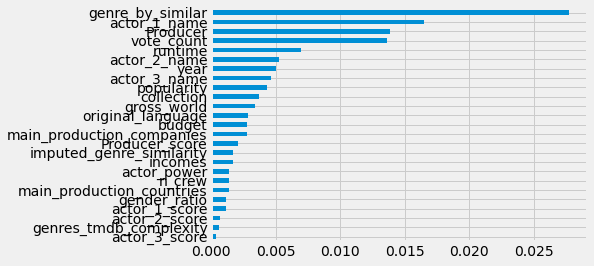

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric neg_mean_absolute_error neg_mean_squared_log_error
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)
X_val_tranformed = pipe.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_tranformed, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values().plot.barh()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

## PDP

In [ ]:
!pip install pdpbox
!pip install shap

In [33]:
import shap

In [34]:
from pdpbox.pdp import pdp_isolate, pdp_plot
# plt.rcParams['figure.dpi'] = 144

In [ ]:
# popularity                   0.008251
# Producer                     0.014466
# actor_1_name                 0.017349
# genre_by_similar             0.026732
# vote_count


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


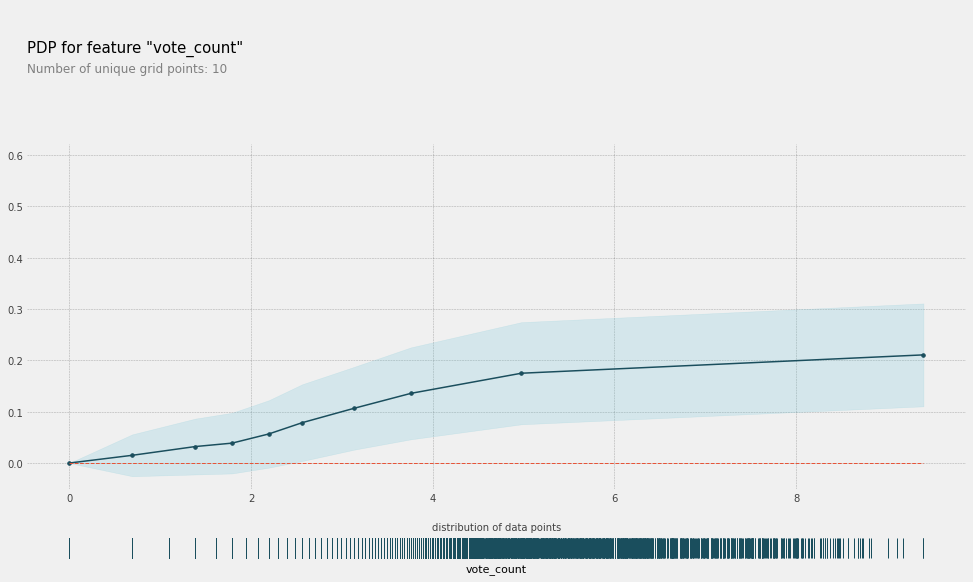

In [36]:
feature = 'vote_count'

isolated = pdp_isolate(
    model=model_rf, 
    dataset=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index), 
    model_features=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index).columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated
         , feature_name=feature
#          , plot_lines=True # ICE plots
#          , frac_to_plot=100 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True);

In [50]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['year', 'vote_count']

interaction = pdp_interact(
    model=model_rf, 
    dataset=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index),
    model_features=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index).columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

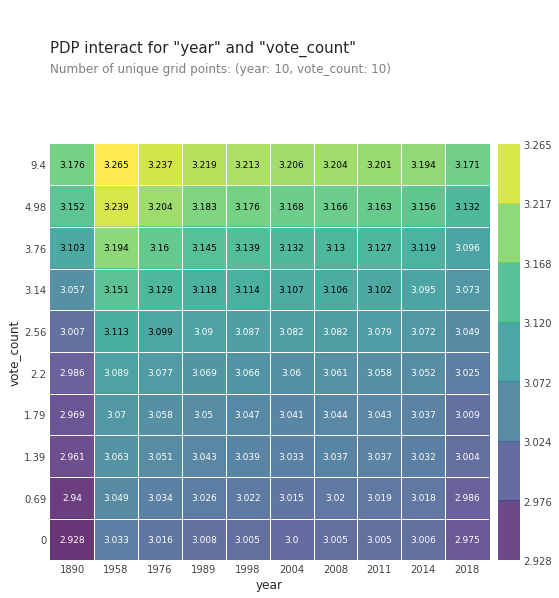

In [52]:
sns.set_style("white")
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [53]:
# 위에서 만든 2D PDP를 테이블로 변환(using Pandas, df.pivot_table)하여 사용합니다

pdp = interaction.pdp.pivot_table(
    values='preds', # interaction['preds']
    columns=features[0], 
    index=features[1]
    )[::-1] # 인덱스를 역순으로 만드는 slicing입니다
pdp

year,1890.000,1958.000,1976.000,1989.000,1998.000,2004.000,2008.000,2011.000,2014.000,2018.000
vote_count,,,,,,,,,,
9.402,3.176,3.265,3.237,3.219,3.213,3.206,3.204,3.201,3.194,3.171
4.977,3.152,3.239,3.204,3.183,3.176,3.168,3.166,3.163,3.156,3.132
3.761,3.103,3.194,3.160,3.145,3.139,3.132,3.130,3.127,3.119,3.096
3.135,3.057,3.151,3.129,3.118,3.114,3.107,3.106,3.102,3.095,3.073
2.565,3.007,3.113,3.099,3.090,3.087,3.082,3.082,3.079,3.072,3.049
2.197,2.986,3.089,3.077,3.069,3.066,3.060,3.061,3.058,3.052,3.025
1.792,2.969,3.070,3.058,3.050,3.047,3.041,3.044,3.043,3.037,3.009
1.386,2.961,3.063,3.051,3.043,3.039,3.033,3.037,3.037,3.032,3.004
0.693,2.940,3.049,3.034,3.026,3.022,3.015,3.020,3.019,3.018,2.986


In [54]:

import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

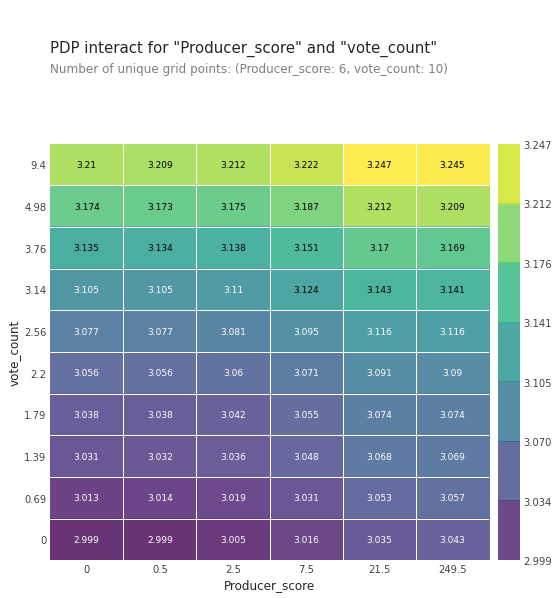

In [55]:
features = ['Producer_score', 'vote_count']

interaction = pdp_interact(
    model=model_rf, 
    dataset=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index),
    model_features=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index).columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [43]:
X_val_vis = pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index)

In [61]:
df_p.head()

,tmdbID,original_language,original_title,popularity,runtime,spoken_languages,status,vote_average,vote_count,imdbId,genres_tmdb,genres_tmdb_complexity,collection,n_production_companies,main_production_companies,n_production_countries,main_production_countries,year,month,budget,gross_world,incomes,movieId,tmdbId,rating,actor_1_name,actor_2_name,actor_3_name,actor_1_gender,actor_2_gender,actor_3_gender,n_crew,Producer,Producer_score,actor_1_won,actor_1_nominat,actor_2_won,actor_2_nominat,actor_3_won,actor_3_nominat,genre_similarity,genre_by_similar,gender_ratio
0,862,en,Toy Story,3.133,81.000,1,Released,7.700,8.597,0114709,Animation|Comedy|Family,3,Toy Story Collection,1,Pixar Animation Studios,1,United States of America,1995.000,10.000,17.217,19.739,2.599,1.000,862,3.887,Tom Hanks,Tim Allen,Don Rickles,2.000,2.000,2.000,106.000,John Lasseter,50.500,52.000,118.000,10.000,10.000,7.000,2.000,0.091,Comedy|Family,6.000
1,8844,en,Jumanji,2.891,104.000,2,Released,6.900,7.789,0113497,Adventure|Fantasy|Family,3,none_collection,3,TriStar Pictures,1,United States of America,1995.000,12.000,17.990,19.387,1.618,2.000,8844,3.247,Robin Williams,Jonathan Hyde,Kirsten Dunst,2.000,2.000,1.000,16.000,Larry J. Franco,0.000,26.000,56.000,1.000,0.000,27.000,70.000,0.083,Family|Fantasy,5.000
2,15602,en,Grumpier Old Men,2.543,101.000,1,Released,6.500,4.533,0113228,Romance|Comedy,2,Grumpy Old Men Collection,2,Warner Bros.,1,United States of America,1995.000,12.000,17.034,18.085,1.351,3.000,15602,3.174,Walter Matthau,Jack Lemmon,Ann-Margret,2.000,2.000,1.000,4.000,Howard Deutch,1.500,13.000,20.000,25.000,55.000,22.000,57.000,0.091,Comedy|Romance,5.000
3,31357,en,Waiting to Exhale,1.581,127.000,1,Released,6.100,3.555,0114885,Comedy|Drama|Romance,3,none_collection,1,Twentieth Century Fox Film Corporation,1,United States of America,1995.000,12.000,16.588,18.216,1.807,4.000,31357,2.875,Whitney Houston,Angela Bassett,Loretta Devine,1.000,1.000,1.000,10.000,Forest Whitaker,78.500,263.000,218.000,20.000,74.000,4.000,16.000,0.077,Drama|Romance,3.000
4,11862,en,Father of the Bride Part II,2.239,106.000,1,Released,5.700,5.159,0113041,Comedy,1,Father of the Bride Collection,2,etc,1,United States of America,1995.000,2.000,17.217,18.154,1.268,5.000,11862,3.077,Steve Martin,Diane Keaton,Martin Short,2.000,1.000,2.000,7.000,Alan Silvestri,0.000,22.000,48.000,28.000,69.000,8.000,29.000,1.000,Comedy,5.000


In [63]:
df_p.loc[24149,'tmdbID'] # original title id 급하니까 EDA에서 눈으로 찾는다.. = Tattoo Nation
df_p.loc[7134,'tmdbID'] # Hell's Kitchen 

37900

In [60]:
X_val_vis.iloc[[99]]

,original_language,popularity,runtime,vote_count,genres_tmdb_complexity,collection,main_production_companies,main_production_countries,year,budget,gross_world,incomes,actor_1_name,actor_2_name,actor_3_name,n_crew,Producer,Producer_score,genre_by_similar,gender_ratio,actor_1_score,actor_2_score,actor_3_score,imputed_genre_similarity,actor_power
24149,3.034,0.723,86.000,1.792,1.000,3.091,3.052,3.011,2013.000,15.425,9.005,0.272,2.736,3.080,3.080,2.000,3.080,0.000,3.414,4.000,1.000,1.000,2.000,1.000,1.333


In [58]:
raw = X_val_vis.iloc[[120]] # [[]]면 dataframe으로 반환, 꿀팁
raw

,original_language,popularity,runtime,vote_count,genres_tmdb_complexity,collection,main_production_companies,main_production_countries,year,budget,gross_world,incomes,actor_1_name,actor_2_name,actor_3_name,n_crew,Producer,Producer_score,genre_by_similar,gender_ratio,actor_1_score,actor_2_score,actor_3_score,imputed_genre_similarity,actor_power
7134,3.034,1.380,95.000,2.565,2.000,3.091,3.056,3.011,1998.000,15.607,9.368,0.002,3.193,2.922,3.246,2.000,3.080,0.000,3.153,4.000,16.500,0.000,112.000,0.111,42.833


In [59]:
#tree 모델의 예측값
model_rf.predict(raw)

import shap

explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(raw)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=raw
)

In [66]:
# 300개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의하세요.
shap_values = explainer.shap_values(X_val_vis.iloc[:300])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_val_vis.iloc[:300])

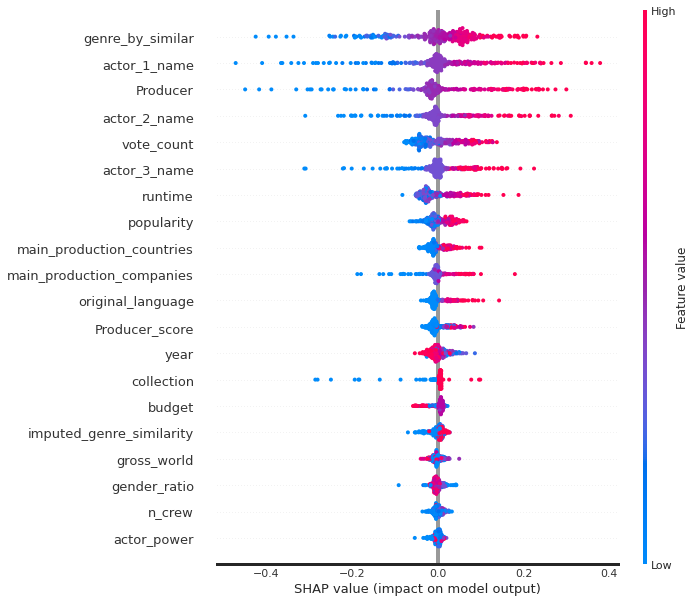

In [67]:
shap.summary_plot(shap_values, X_val_vis.iloc[:300])